# Beta Distribution
### CA2 @ EPS Course

#### Instructors: Dr. Tavassolipour, Dr. Vahabie

---

### Instructions:
-  Replace the placeholders (between <font color="green">`## TODO ##`</font> and <font color="green">`## TODO ##`</font>) with the appropriate details.
- Ensure you run each cell after you've entered your solution.

---

*Full Name:* Parsa Alizadeh malafe

*SID:* 810101572

The objective of this notebook is to estimate the probability of getting tails in a coin flip using a Bayesian approach.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import random

In [2]:
random.seed(572)
class BetaDistribution:
    """
    Represents a beta distribution with the given shape parameters.
    """

    def __init__(self, alpha: float, beta: float):
        """
        Args:
            alpha (float): The first shape parameter of the beta distribution.
            beta (float): The second shape parameter of the beta distribution.
        """

        ######################  TODO  ########################
        self.alpha = alpha
        self.beta = beta
        self.normalization_constant = self.__calculate_normalization_constant()
        ######################  TODO  ########################

    def pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the normalized probability density function (PDF) of the beta distribution at the given input value(s).
        Args:
            x (float or np.ndarray): The input value(s) to evaluate the beta distribution PDF at.
        Returns:
            pdf (float or np.ndarray): The normalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        return self.__unnormalized_pdf(x) * self.normalization_constant
        ######################  TODO  ########################

    def __unnormalized_pdf(self, x: Union[float, np.ndarray]) -> Union[float, np.ndarray]:
        """
        Calculates the unnormalized probability density function (PDF) of the beta distribution at the given input value(s).

        Args:
            x (float or np.ndarray): The input value(s) to evaluate the unnormalized beta distribution PDF at.

        Returns:
            pdf (float or np.ndarray): The unnormalized probability density function evaluated at the input value(s).
        """
        ######################  TODO  ########################
        return x**(self.alpha - 1) * (1 - x)**(self.beta - 1)
        ######################  TODO  ########################

    def __calculate_normalization_constant(self):
        """
        Calculates the normalization constant for the beta distribution.
        This constant is used to ensure that the total probability under the PDF is 1.
        """
        ######################  TODO  ########################
        # Proceed with the numerical approach
        return gamma(self.alpha + self.beta) / (gamma(self.alpha) * gamma(self.beta))
        ######################  TODO  ########################
        
        


In [3]:
def plot_beta_dist(beta: BetaDistribution):
    """
    Plots the probability density function of the given beta distribution.

    Args:
        beta (BetaDistribution): The beta distribution instance to plot.
    """
    ######################  TODO  ########################
    # Do not forget to add title, labels, and legend.
    x = np.linspace(0, 1, 200)
    y = beta.pdf(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y)
    plt.title(f'Beta Distribution (α={beta.alpha}, β={beta.beta})')
    plt.xlabel('θ (Probability of Tails)')
    plt.ylabel('Probability Density')
    plt.grid(True)
    plt.show()
    ######################  TODO  ########################

Read the `coint_flips.txt` file and plot the posterior distributions after every 50 trials for two prior probabilities:
1. Uniform distribution 
2. $Beta (4, 10)$

In [ ]:
######################  TODO  ########################
# Read coin_flips.txt
    # Read coin flips
with open('coin_flips.txt', 'r') as f:
 coin_flips = f.read().strip()
 
 
prior_uniform = BetaDistribution(1, 1)
alpha_uniform, beta_uniform = 1, 1
for trial in coin_flips:
    if trial == 'H':
        alpha_uniform += 1
    else:
        beta_uniform += 1
        
posterior_uniform = BetaDistribution(alpha_uniform, beta_uniform)
posterior_mean_uniform = alpha_uniform / (alpha_uniform + beta_uniform)
posterior_var_uniform = (alpha_uniform * beta_uniform) / ((alpha_uniform + beta_uniform)**2 * (alpha_uniform + beta_uniform + 1))


prior_beta = BetaDistribution(4, 10)
alpha_beta, beta_beta = 4, 10
for trial in coin_flips:
    if trial == 'H':
        alpha_beta += 1
    else:
        beta_beta += 1
        
posterior_beta = BetaDistribution(alpha_beta, beta_beta)
posterior_mean_beta = alpha_beta / (alpha_beta + beta_beta)
posterior_var_beta = (alpha_beta * beta_beta) / ((alpha_beta + beta_beta)**2 * (alpha_beta + beta_beta + 1))
        
    

######################  TODO  ########################

## Prior: Uniform

**Hint:** use `plt.figure(figsize=(25, 20))` and `plt.subplot(4, 5, ...)`

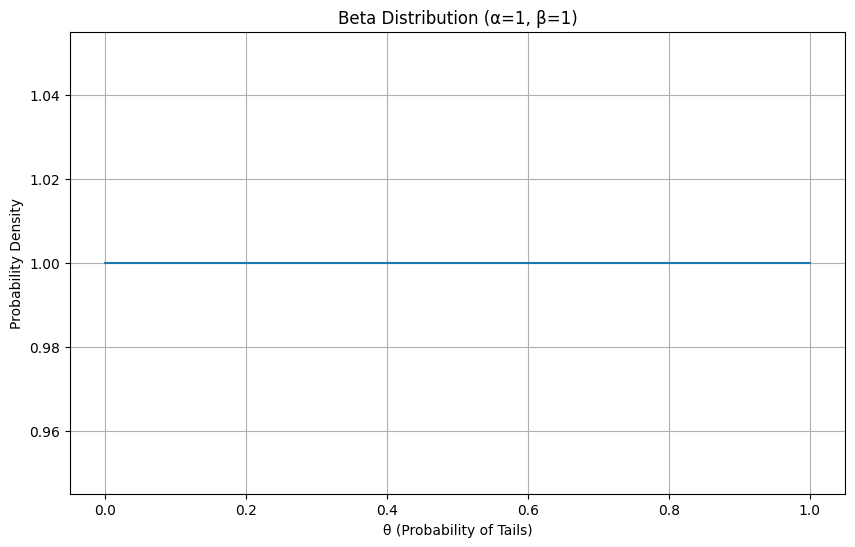

<Figure size 2500x2000 with 0 Axes>

<Figure size 2500x2000 with 0 Axes>

In [24]:
######################  TODO  ########################
uniform_prior = BetaDistribution(1, 1)
plot_beta_dist(uniform_prior)
plt.figure(figsize=(25, 20))
######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [ ]:
######################  TODO  ########################
######################  TODO  ########################

## Prior: $Beta(4, 10)$

<Figure size 2500x2000 with 0 Axes>

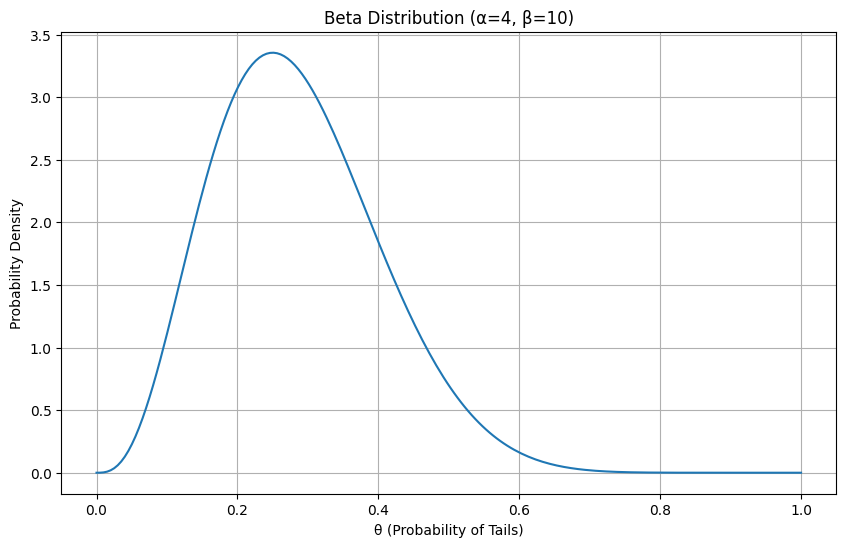

In [10]:
######################  TODO  ########################
plt.figure(figsize=(25, 20))
informative_prior = BetaDistribution(4, 10)
plot_beta_dist(informative_prior)
######################  TODO  ########################

Now calculate the final posterior mean and variance.

In [7]:
######################  TODO  ########################
def calculate_posterior_stats(final_alpha, final_beta):
   
    # mean
    posterior_mean = final_alpha / (final_alpha + final_beta)
    
    # variance
    posterior_variance = (final_alpha * final_beta) / \
                         ((final_alpha + final_beta)**2 * (final_alpha + final_beta + 1))
    
    return posterior_mean, posterior_variance

with open('coin_flips.txt', 'r') as f:
    coin_flips = f.read().splitlines()

print("\nUniform Prior (Beta(1,1))")
# Beta(1,1)
final_uniform_alpha = 1 + sum(1 for flip in coin_flips if flip == 'T')
final_uniform_beta = 1 + sum(1 for flip in coin_flips if flip == 'H')

uniform_mean, uniform_variance = calculate_posterior_stats(final_uniform_alpha, final_uniform_beta)

print(f"Final Posterior Parameters: α = {final_uniform_alpha}, β = {final_uniform_beta}")
print(f"Posterior Mean: {uniform_mean:.4f}")
print(f"Posterior Variance: {uniform_variance:.4f}")

print("\nInformative Prior (Beta(4,10))")
#  Beta(4,10)
final_informative_alpha = 4 + sum(1 for flip in coin_flips if flip == 'T')
final_informative_beta = 10 + sum(1 for flip in coin_flips if flip == 'H')

informative_mean, informative_variance = calculate_posterior_stats(final_informative_alpha, final_informative_beta)

print(f"Final Posterior Parameters: α = {final_informative_alpha}, β = {final_informative_beta}")
print(f"Posterior Mean: {informative_mean:.4f}")
print(f"Posterior Variance: {informative_variance:.4f}")

######################  TODO  ########################


Uniform Prior (Beta(1,1))
Final Posterior Parameters: α = 636, β = 366
Posterior Mean: 0.6347
Posterior Variance: 0.0002

Informative Prior (Beta(4,10))
Final Posterior Parameters: α = 639, β = 375
Posterior Mean: 0.6302
Posterior Variance: 0.0002


mean = α / (α + β)
variance = (α * β) / ((α + β)² * (α + β + 1))
در اینجا تابعی تعریف مردم تا میانگین پسین و وارایانس پسین را محاسبه کند. سپس فایل را باز کرده اطلاعات را استخراج میکنیم و با استفاده از آن  برای دو توزیع خواسته شده محاسبات را انجام می دهیم.